In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

# 한글설정
from matplotlib import font_manager
f_path = '/Library/Fonts/NanumGothic.ttf'
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family = 'NanumGothic')


* 제주도 2차 재난지원금 신청: 8. 24. ~ 10. 11.

"""


* YM : 기준년월 
* SIDO : 지역대분류명 
* SIGUNGU : 지역중분류명 
* FranClass : 소상공인구분 
* Type : 업종명 
* Time : 시간대 
* vTotalSpent : 총사용금액 
* DisSpent : 재난지원금 사용금액 
* NumOfSpent : 총 이용건수 
* NumOfDisSpent : 총 재난지원금 이용건수 
* POINT_X, POINT_Y : X,Y 좌표 


"""


In [2]:
# 파일 불러오기
dfs=[]
file_list = glob('./data/*.txt')
for each_file in file_list:
    df = pd.read_csv(each_file, thousands = ',')
    dfs.append(df)
    
df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)
df= df.set_index('Field1')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119429 entries, 1 to 280085
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   OBJECTID       1119429 non-null  int64  
 1   YM             1119429 non-null  int64  
 2   SIDO           1119429 non-null  object 
 3   SIGUNGU        1119429 non-null  object 
 4   FranClass      1119429 non-null  object 
 5   Type           1119429 non-null  object 
 6   Time           1119429 non-null  object 
 7   TotalSpent     1119429 non-null  int64  
 8   DisSpent       1119429 non-null  int64  
 9   NumofSpent     1119429 non-null  int64  
 10  NumofDisSpent  1119429 non-null  int64  
 11  POINT_X        1119429 non-null  float64
 12  POINT_Y        1119429 non-null  float64
 13  X              284265 non-null   float64
 14  Y              284265 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 136.6+ MB


In [3]:
df.head()

,OBJECTID,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,X,Y
Field1,,,,,,,,,,,,,,,
1,1,202006,제주특별자치도,제주시,영세,일반한식,00시,502000,0,10,0,877005.9834,1.479766e+06,NaN,NaN
2,2,202006,제주특별자치도,제주시,영세,단란주점,00시,1520000,0,8,0,877005.7447,1.479816e+06,NaN,NaN
3,3,202006,제주특별자치도,제주시,중소1,편의점,00시,482310,0,35,0,877056.6756,1.479616e+06,NaN,NaN
4,4,202006,제주특별자치도,제주시,영세,편의점,00시,38050,5450,3,1,877055.9593,1.479766e+06,NaN,NaN
5,5,202006,제주특별자치도,제주시,영세,일반한식,00시,32000,32000,1,1,877055.4817,1.479866e+06,NaN,NaN


In [6]:
# 7월에만 있는 X, Y는 없애 줌
df= df.drop(['X', 'Y'], axis=1)
# time의 시는 제거
df['Time']= df['Time'].str.replace('시', '')

NameError: name 'df' is not defined

In [11]:
df['TS-DS'] = df['TotalSpent']-df['DisSpent']
df['NTS-NDS'] = round(df['NumofSpent']-df['NumofDisSpent'],0)
df['Mts']=round(df['TotalSpent']/df['NumofSpent'],0)
df['Mds']=df['DisSpent']/df['NumofDisSpent']
# 제주도 인구수 추가
df['population'] = df['SIGUNGU'].map({'제주시':492072, '서귀포시':181929})
# nan값은 0으로 채워주기
df['Mds']= df['Mds'].fillna(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119429 entries, 1 to 280085
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   YM             1119429 non-null  int64  
 1   SIDO           1119429 non-null  object 
 2   SIGUNGU        1119429 non-null  object 
 3   FranClass      1119429 non-null  object 
 4   Type           1119429 non-null  object 
 5   Time           1119429 non-null  object 
 6   TotalSpent     1119429 non-null  int64  
 7   DisSpent       1119429 non-null  int64  
 8   NumofSpent     1119429 non-null  int64  
 9   NumofDisSpent  1119429 non-null  int64  
 10  POINT_X        1119429 non-null  float64
 11  POINT_Y        1119429 non-null  float64
 12  TS-DS          1119429 non-null  int64  
 13  NTS-NDS        1119429 non-null  int64  
 14  Mts            1119429 non-null  float64
 15  Mds            1119429 non-null  float64
 16  population     1119429 non-null  int64  
dtypes: float6

In [13]:
# 재난지원금 사용금액이 없는 수는 824705곳
len(df[df['DisSpent'] == 0])

824705

In [14]:
# 총 재난지원금 이용건수 824780
df[df['NumofDisSpent'] == 0]

# 재난지원금 사용금액은 0이 아닌데 재난지원금 이용건수는 0이다 ??
df[(df['NumofDisSpent']==0) & (df['DisSpent']!=0)]

,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds,population
Field1,,,,,,,,,,,,,,,,,
3788,202006,제주특별자치도,서귀포시,영세,편의점,00,215250,1000,24,0,912218.8029,1.473837e+06,214250,24,8969.0,inf,181929
21147,202006,제주특별자치도,서귀포시,중소1,슈퍼마켓,07,3920,-1040,1,0,907121.0749,1.473813e+06,4960,1,3920.0,-inf,181929
51864,202006,제주특별자치도,서귀포시,일반,기타숙박업,10,215800,-35200,3,0,913120.0740,1.473491e+06,251000,3,71933.0,-inf,181929
79119,202006,제주특별자치도,제주시,중소2,스포츠레져용품,12,2144200,160036,15,0,906195.3843,1.500147e+06,1984164,15,142947.0,inf,492072
96977,202006,제주특별자치도,제주시,중소,동물병원,13,691490,-53200,10,0,905449.8003,1.499294e+06,744690,10,69149.0,-inf,492072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186502,202005,제주특별자치도,서귀포시,일반,가정용품수리,17,1027000,-16500,12,0,913167.1908,1.474091e+06,1043500,12,85583.0,-inf,181929
193539,202005,제주특별자치도,제주시,영세,기타레져업,18,106500,38360,6,0,899199.7581,1.499863e+06,68140,6,17750.0,inf,492072
211399,202005,제주특별자치도,서귀포시,중소1,일반한식,19,226500,-176000,17,0,891529.6405,1.473438e+06,402500,17,13324.0,-inf,181929


In [15]:
print(df['SIDO'].unique())
print(df['SIGUNGU'].unique())
print(df['FranClass'].unique())
print(df['Type'].unique())
print(df['Time'].unique())
print(df['TotalSpent'].unique())
print(df['DisSpent'].unique())
# print(df['NumofSpent'].unique())
# print(df['NumofDisSpent'].unique())

#Type은 묶어줘야 할 것 같음

['제주특별자치도']
['제주시' '서귀포시']
['영세' '중소1' '중소' '중소2' '일반']
['일반한식' '단란주점' '편의점' '주점' '스넥' '콘도' '일식회집' '기타음료식품' '기타숙박업' '노래방' '기타잡화'
 '중국음식' '당구장' '서양음식' '슈퍼마켓' '유아원' '유흥주점' '기타레져업' '농축수산품' '골프경기장' '세탁소'
 '위탁급식업' '기타유통업' '문화취미기타' '주유소' '스포츠레져용품' '구내매점' '특급호텔' '볼링장' '신발'
 '기타회원제형태업소' '제과점' '피부미용실' '칵테일바' '골프용품' '사무서비스' 'LPG' '세차장' '영화관' '주차장'
 '종합병원' '사우나' '학원(회원제형태)' '화장품' '헬스크럽' '의원' '2급호텔' '독서실' '주류판매점' '골프연습장'
 '기타대인서비스' '성인용품점' '화물운송' '애완동물' '안마스포츠마사지' '정장' '동물병원' '약국' '상품권'
 '인터넷Mall' '항공사' '레져업소(회원제형태)' '1급호텔' '침구수예점' '악세사리' '보관창고업' '기념품점' '화원'
 '미용원' '종합용역' '목재석재철물' '인터넷종합Mall' '대형할인점' '기타연료' '조명기구' '문구용품' '사진관'
 '자동차정비' '컴퓨터' '조세서비스' '기타의료기관및기기' '유류판매' '기계공구' '보일러펌프' '기타업종' '미곡상'
 '건축요업품' '렌트카' '소프트웨어' '택시' '수영장' '비료농약사료종자' '농축협직영매장' '기타건축자재' '농기계'
 '정육점' '페인트' '스포츠의류' '양품점' '자동차부품' '기타가구' '관광여행' '이용원' '면세점' '종합레져타운'
 '일반서적' '냉열기기' '주방용식기' '인테리어' '민예공예품' '기타농업관련' '캐쥬얼의류' '기타건강식' '기타운송'
 '연쇄점' '옷감직물' '한의원' '여객선' '기타수리서비스' '농협하나로클럽' '기타전기제품' '가전제품' '기타용역서비스'
 '일반가구' '기능학원' '카페트커텐천막' 

In [16]:
df['Type'].value_counts()

일반한식            266941
편의점             106713
서양음식             93810
스넥               33898
미용원              32160
                 ...  
제약회사                16
사무서비스(회원제형태)        12
정보서비스                4
골동품점                 2
기타비영리유통              1
Name: Type, Length: 206, dtype: int64

In [64]:
# X시는 뭘까? =미승인 자동결제 4%정도
# 빼도 될 것 같은데
len(df[df['Time']=='x시']) / 1119429

0.041976757793482214

In [31]:
df[df['Time']=='x']

,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds
Field1,,,,,,,,,,,,,,,,
267149,202006,제주특별자치도,제주시,일반,일반한식,x,68000,0,1,0,875662.8437,1.478460e+06,68000,1,68000.000000,NaN
267150,202006,제주특별자치도,제주시,영세,서양음식,x,12000,0,1,0,875653.2934,1.480459e+06,12000,1,12000.000000,NaN
267151,202006,제주특별자치도,제주시,영세,일식회집,x,30000,0,1,0,875653.2934,1.480459e+06,30000,1,30000.000000,NaN
267152,202006,제주특별자치도,제주시,영세,일반한식,x,36000,0,1,0,875653.0546,1.480509e+06,36000,1,36000.000000,NaN
267153,202006,제주특별자치도,제주시,영세,일반한식,x,22000,0,1,0,875638.9593,1.483458e+06,22000,1,22000.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280081,202008,제주특별자치도,제주시,영세,편의점,x,13700,0,2,0,950266.5976,1.502458e+06,13700,2,6850.000000,NaN
280082,202008,제주특별자치도,제주시,영세,일반한식,x,56000,0,1,0,950317.5379,1.502258e+06,56000,1,56000.000000,NaN
280083,202008,제주특별자치도,제주시,영세,일반한식,x,28000,0,1,0,950469.1585,1.501909e+06,28000,1,28000.000000,NaN


In [ ]:
YM : 기준년월
SIDO : 지역대분류명
SIGUNGU : 지역중분류명
FranClass : 소상공인구분
Type : 업종명
Time : 시간대
TotalSpent : 총사용금액
DisSpent : 재난지원금 사용금액
NumOfSpent : 총 이용건수
NumOfDisSpent : 총 재난지원금 이용건수
POINT_X, POINT_Y : X,Y 좌표

In [18]:
df.head()

,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds,population
Field1,,,,,,,,,,,,,,,,,
1,202006,제주특별자치도,제주시,영세,일반한식,00,502000,0,10,0,877005.9834,1.479766e+06,502000,10,50200.0,0.0,492072
2,202006,제주특별자치도,제주시,영세,단란주점,00,1520000,0,8,0,877005.7447,1.479816e+06,1520000,8,190000.0,0.0,492072
3,202006,제주특별자치도,제주시,중소1,편의점,00,482310,0,35,0,877056.6756,1.479616e+06,482310,35,13780.0,0.0,492072
4,202006,제주특별자치도,제주시,영세,편의점,00,38050,5450,3,1,877055.9593,1.479766e+06,32600,2,12683.0,5450.0,492072
5,202006,제주특별자치도,제주시,영세,일반한식,00,32000,32000,1,1,877055.4817,1.479866e+06,0,0,32000.0,32000.0,492072


<AxesSubplot:xlabel='Time', ylabel='TotalSpent'>

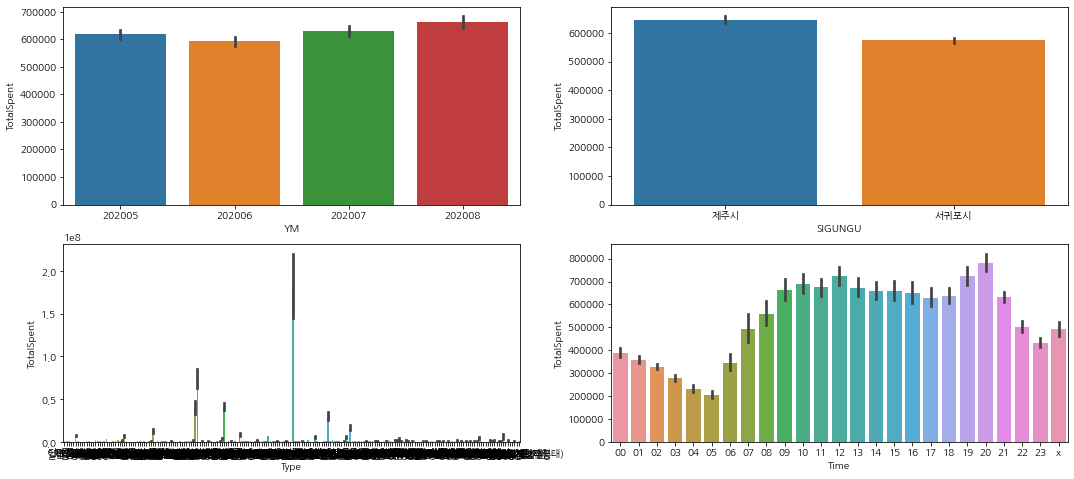

In [17]:
# 총사용금액으로 정리해보기

figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=df, x="YM", y="TotalSpent", ax=ax1)
sns.barplot(data=df, x="SIGUNGU", y="TotalSpent", ax=ax2)
sns.barplot(data=df, x="Type", y="TotalSpent", ax=ax3)
sns.barplot(data=df, x="Time", y="TotalSpent", ax=ax4)



In [ ]:
# 총사용금액은 7,8월은 휴가시즌, 5월은 가정의 달이라 높은 것 같음
# 1인당 소비금액은 서귀포시 제주시 같다
# 저녁시간에 사용금액이 더 많다.

In [27]:
df_si_tot = pd.DataFrame(df.groupby('SIGUNGU')['TotalSpent'].sum())
df_si_tot.reset_index(inplace=True)
df_si_tot['pop'] = df_si_tot['SIGUNGU'].map({'제주시':492072, '서귀포시':181929})
df_si_tot['Mean'] = round(df_si_tot['TotalSpent']/df_si_tot['pop'],0)
df_si_tot

,SIGUNGU,TotalSpent,pop,Mean
0,서귀포시,184477660765,181929,1014009.0
1,제주시,515948349696,492072,1048522.0


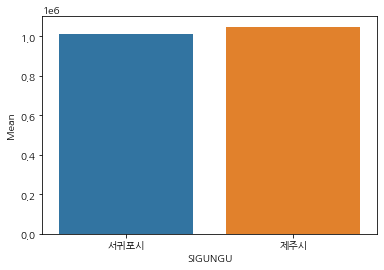

In [29]:
sns.barplot(data=df_si_tot, x="SIGUNGU", y="Mean");
# 1인당 소비금액은 서귀포시 제주시 같다

In [ ]:
# 총사용금액은 7,8월은 휴가시즌, 5월은 가정의 달이라 높은 것 같음
# 1인당 소비금액은 서귀포시 제주시 같다
# 저녁시간에 사용금액이 더 많다.

<AxesSubplot:xlabel='Time', ylabel='DisSpent'>

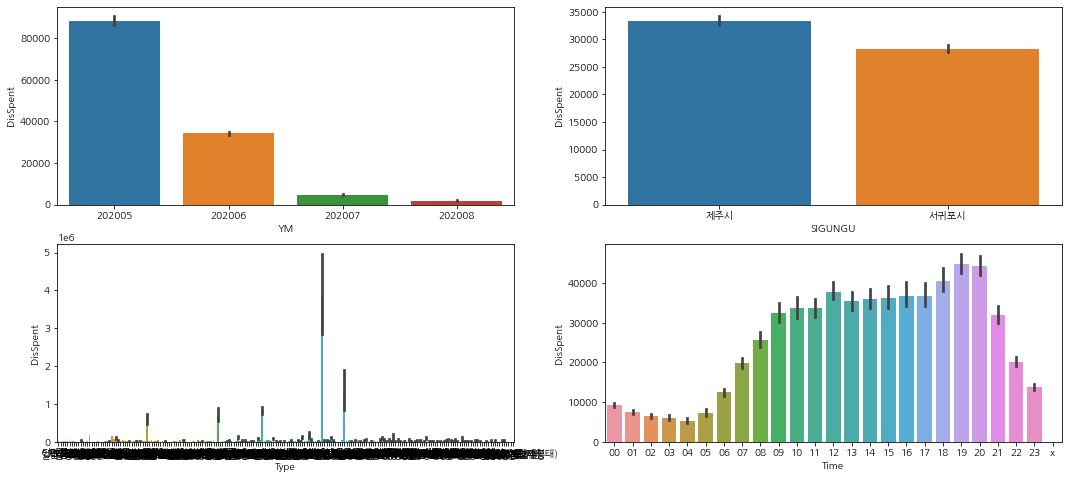

In [30]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=df, x="YM", y="DisSpent", ax=ax1)
sns.barplot(data=df, x="SIGUNGU", y="DisSpent", ax=ax2)
sns.barplot(data=df, x="Type", y="DisSpent", ax=ax3)
sns.barplot(data=df, x="Time", y="DisSpent", ax=ax4)

In [31]:
# 재난지원금 5월에 많고 떨어진다(5월에 받아서...)
# 제주시가 더 많이 소비
# 시간별 소비는 재난지원금이나 총사용금액이나 비슷함

In [33]:
df_si_dis = pd.DataFrame(df.groupby('SIGUNGU')['DisSpent'].sum())
df_si_dis.reset_index(inplace=True)
df_si_dis['pop'] = df_si_dis['SIGUNGU'].map({'제주시':492072, '서귀포시':181929})
df_si_dis['Mean'] = round(df_si_dis['DisSpent']/df_si_dis['pop'],0)
df_si_dis

,SIGUNGU,DisSpent,pop,Mean
0,서귀포시,9090953252,181929,49970.0
1,제주시,26642703395,492072,54144.0


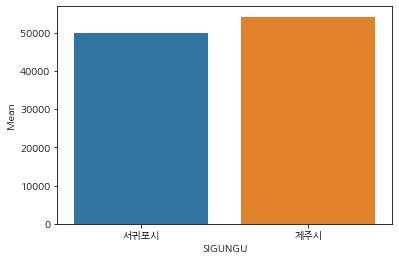

In [34]:
sns.barplot(data=df_si_dis, x="SIGUNGU", y="Mean");
# 1인당 재난지원금 소비금액은 서귀포시 제주시 같다
# 근데 의문점은...재난 지원금액은 사람들마다 받는 금액이 틀린데 똑같이 해줘도 되나....

<AxesSubplot:xlabel='Time', ylabel='TotalSpent'>

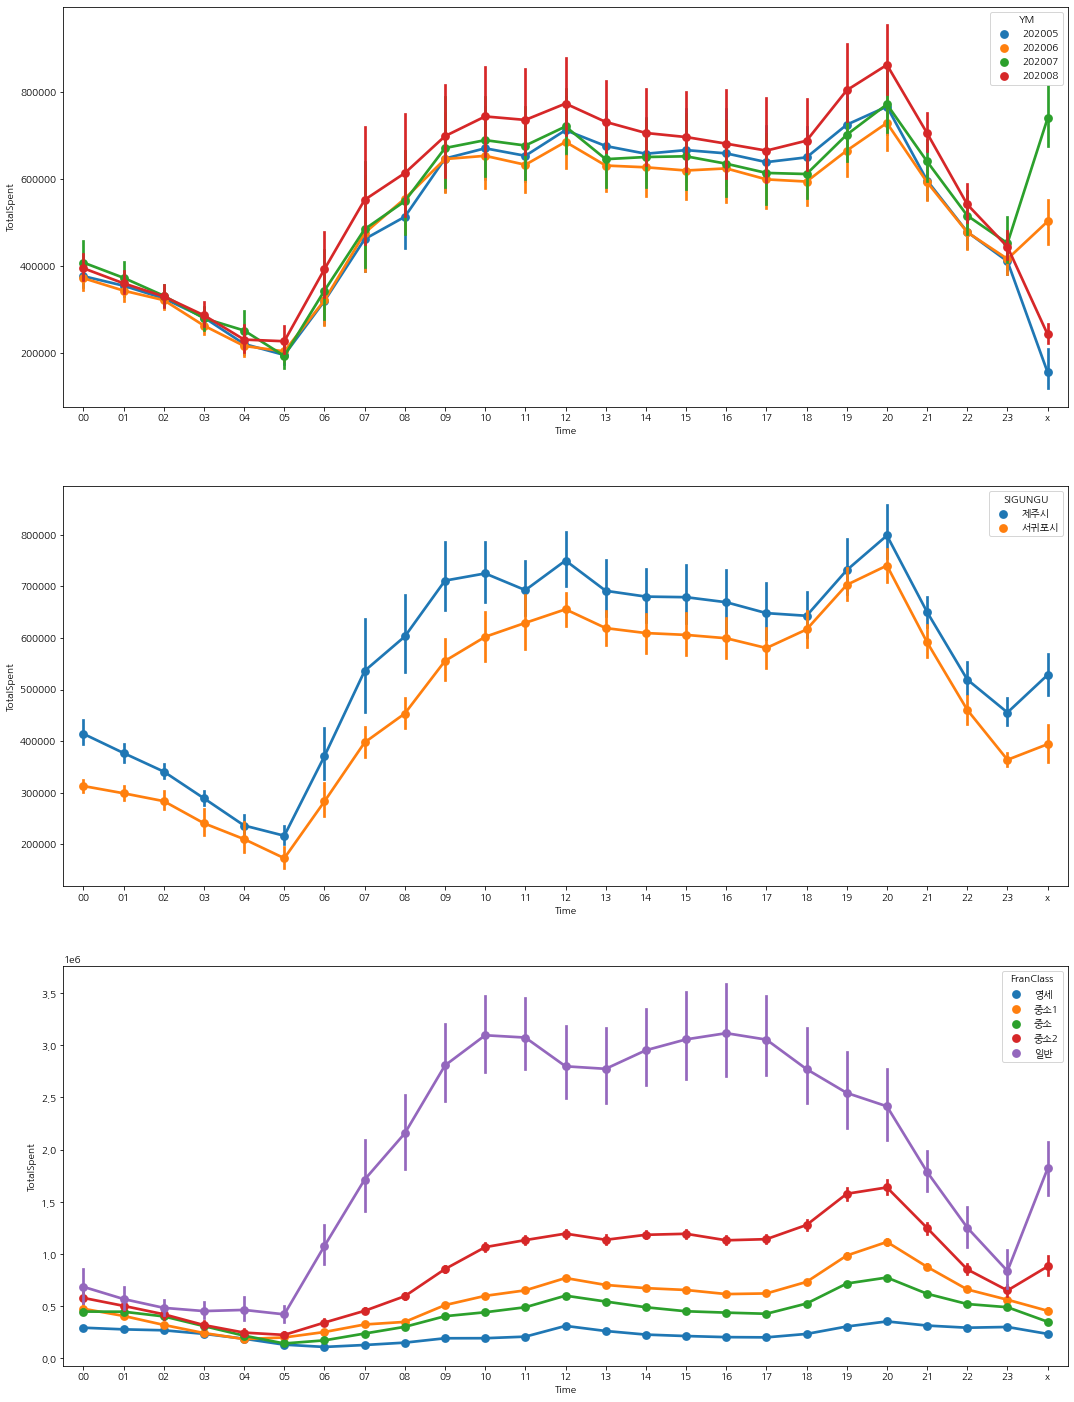

In [35]:

fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,25)

sns.pointplot(data=df, x="Time", y="TotalSpent",hue='YM', ax=ax1)
sns.pointplot(data=df, x="Time",y= df["TotalSpent"], hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)
sns.pointplot(data=df, x="Time", y="TotalSpent", hue="FranClass", ax=ax3)


In [ ]:
# 일반에서 떨어질때 다른 곳이 오름 점심 시간을 피해서 장을 보러가는게(마트) 아닐까?

<AxesSubplot:xlabel='Time', ylabel='DisSpent'>

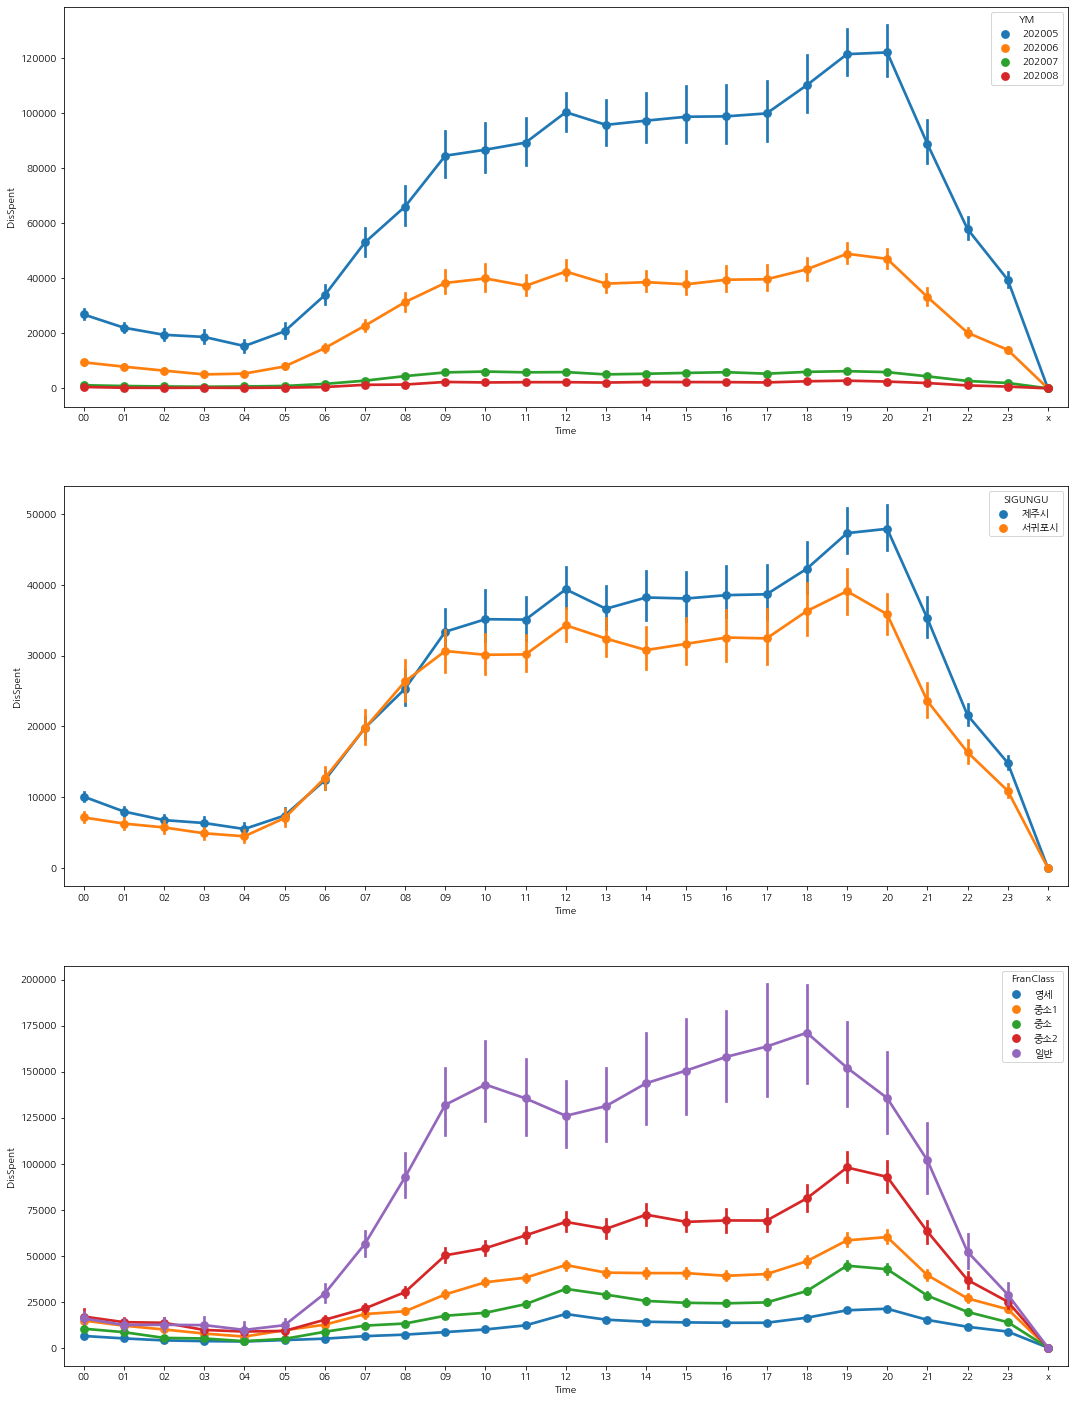

In [37]:

fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,25)


sns.pointplot(data=df, x="Time", y="DisSpent",hue='YM', ax=ax1)
sns.pointplot(data=df, x="Time",y= df["DisSpent"], hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)

sns.pointplot(data=df, x="Time", y="DisSpent", hue="FranClass", ax=ax3)

<AxesSubplot:xlabel='Time', ylabel='NumofSpent'>

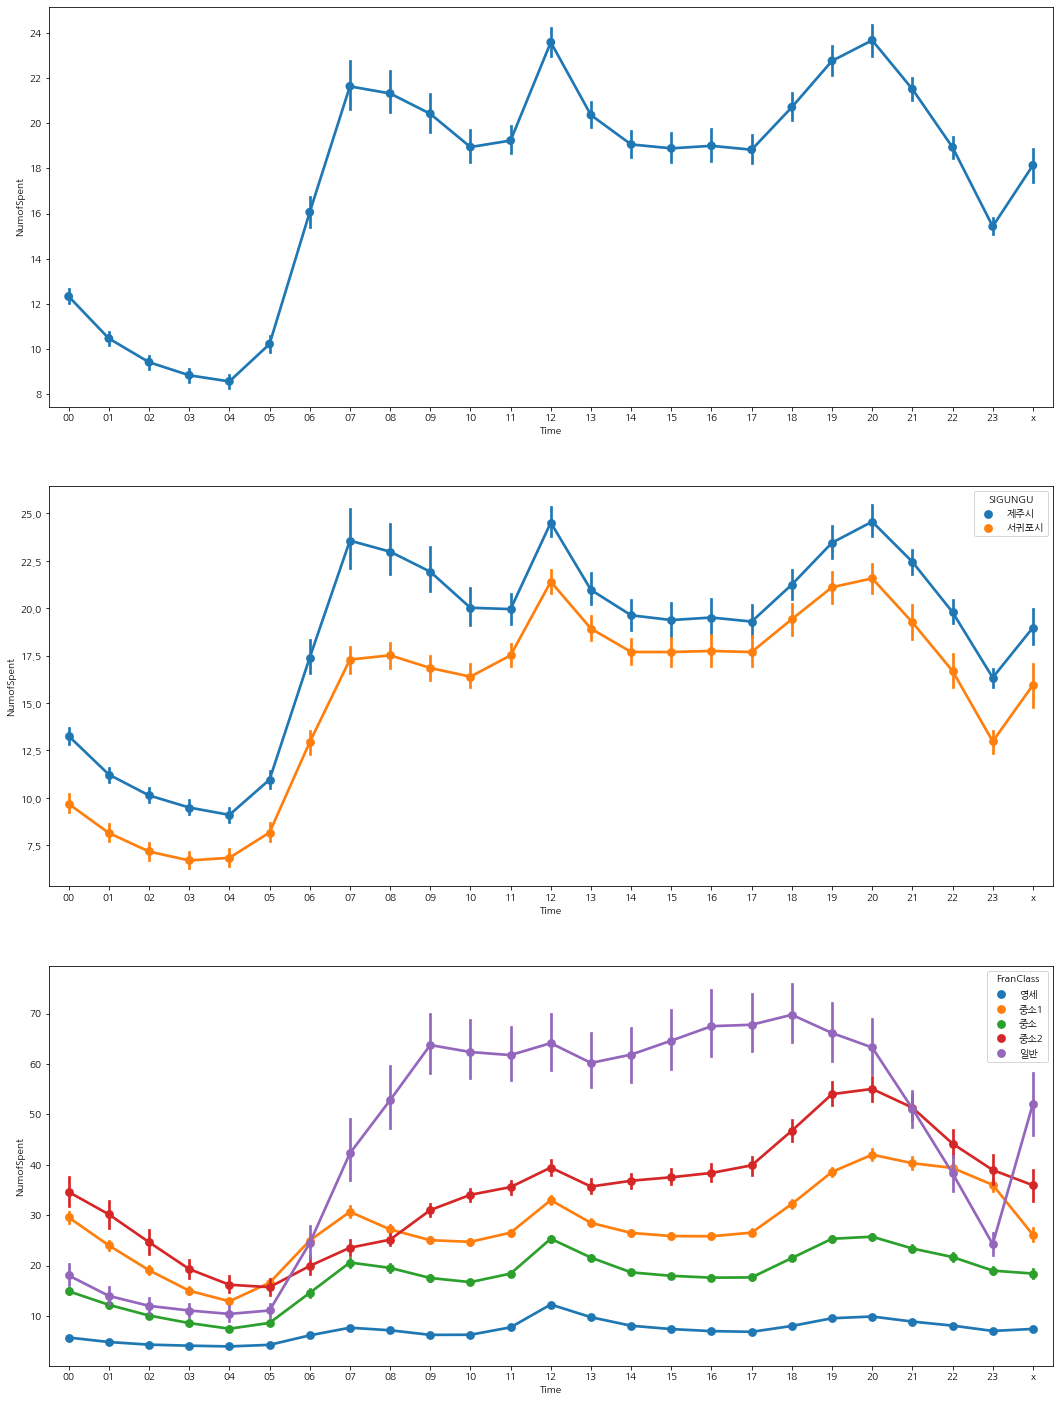

In [38]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,25)

sns.pointplot(data=df, x="Time", y="NumofSpent", ax=ax1)

sns.pointplot(data=df, x="Time",y= "NumofSpent", hue="SIGUNGU", ax=ax2)

# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)

sns.pointplot(data=df, x="Time", y="NumofSpent", hue="FranClass", ax=ax3)




<AxesSubplot:xlabel='Time', ylabel='NumofDisSpent'>

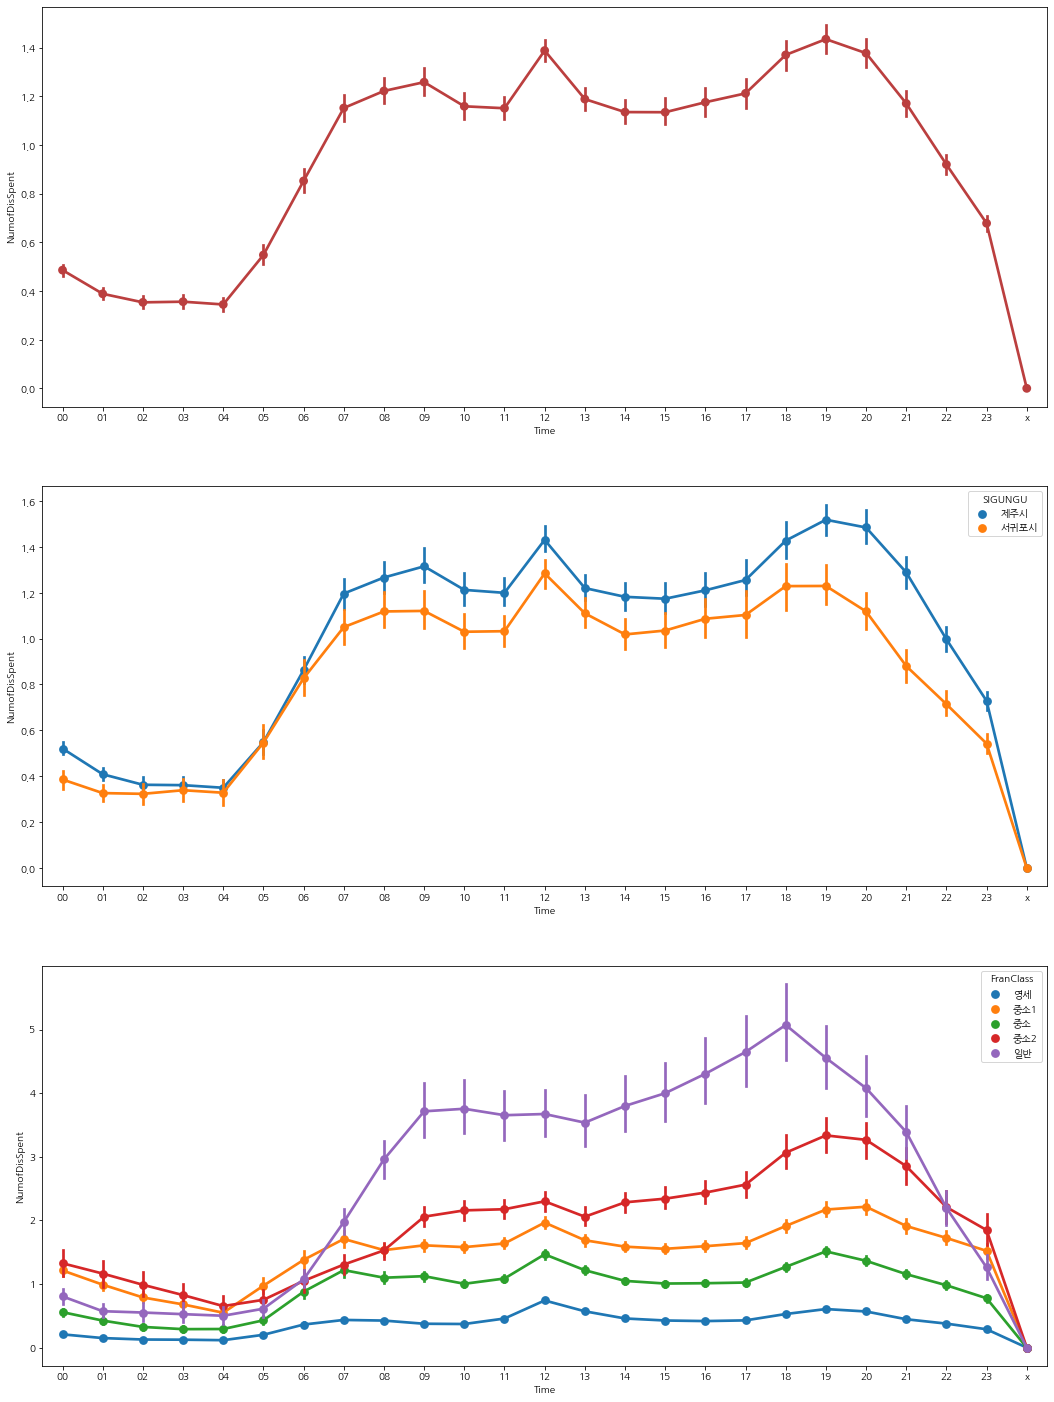

In [55]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,25)


sns.pointplot(data=df, x="Time", y="NumofDisSpent", ax=ax1,color="#bb3f3f")

sns.pointplot(data=df, x="Time",y= "NumofDisSpent", hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)


sns.pointplot(data=df, x="Time", y="NumofDisSpent", hue="FranClass", ax=ax3)


In [ ]:
# 역시 식사를 하는 시간에 많이 소비하고 횟수도 증가함

In [52]:
df_06=df[df['YM']==202006]
df_07=df[df['YM']==202007]
df_08=df[df['YM']==202008]
df_05=df[df['YM']==202005]

<AxesSubplot:xlabel='Time', ylabel='DisSpent'>

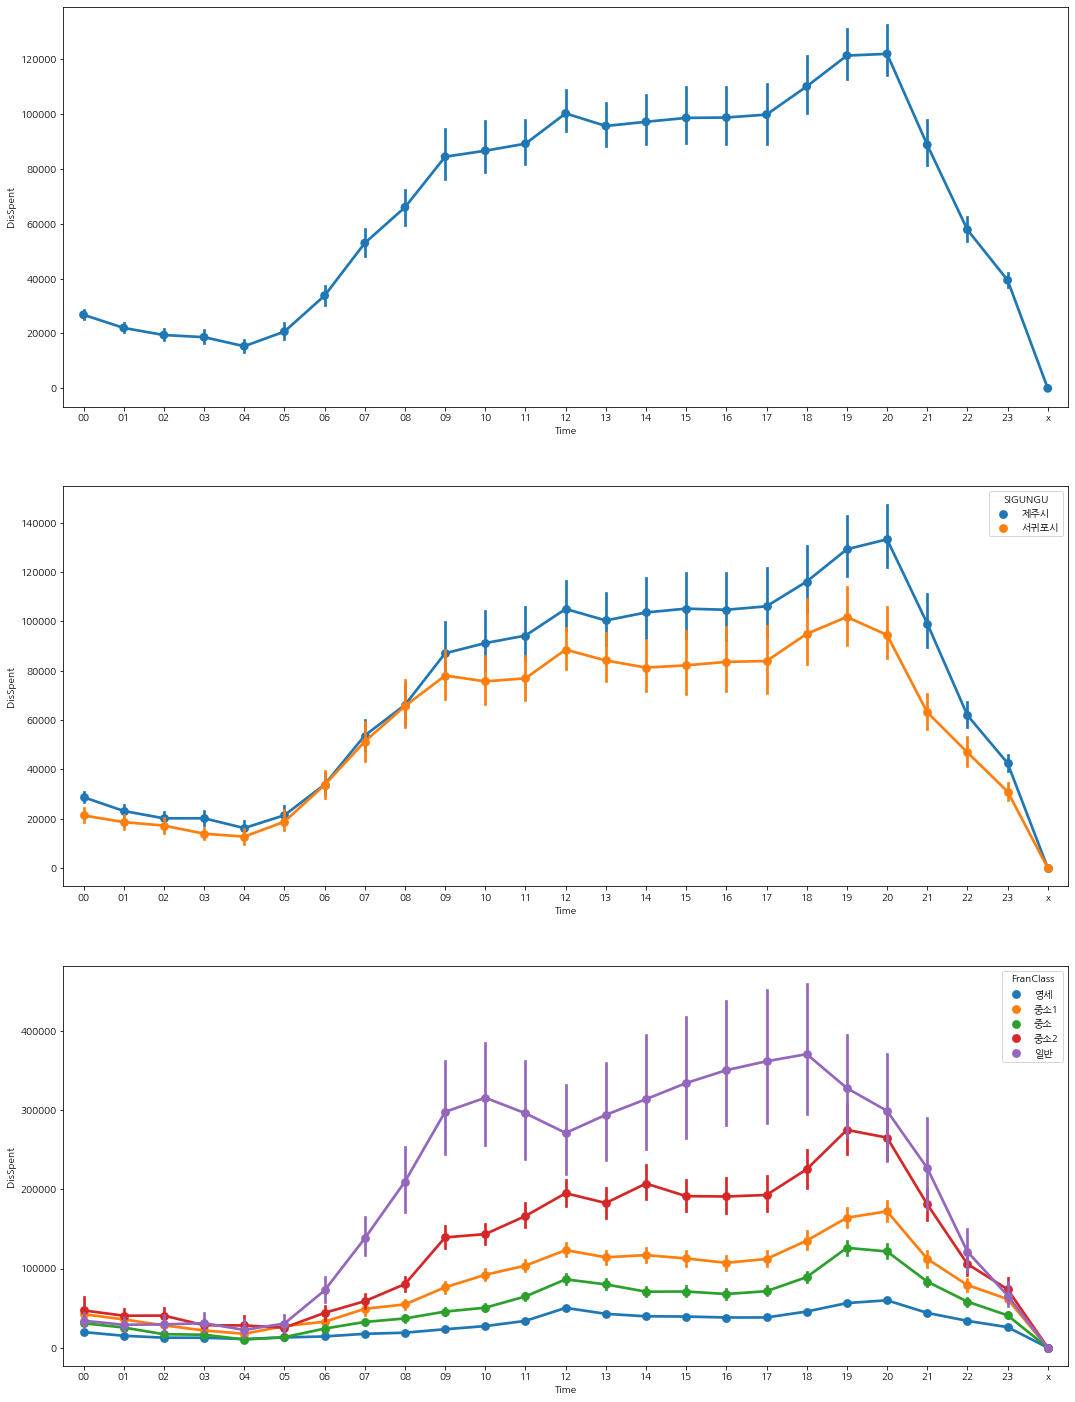

In [54]:

fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,25)


sns.pointplot(data=df_05, x="Time", y="DisSpent", ax=ax1)
sns.pointplot(data=df_05, x="Time",y= "DisSpent", hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)

sns.pointplot(data=df_05, x="Time", y="DisSpent", hue="FranClass", ax=ax3)

In [ ]:
# 재난지원금이 일반매장에서도 많이 사용되었음

In [81]:
df[df['FranClass'] == '일반']

,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds,population
Field1,,,,,,,,,,,,,,,,,
32,202006,제주특별자치도,제주시,일반,스넥,00,146000,0,6,0,882855.1020,1.489839e+06,146000,6,24333.333333,NaN,492072
47,202006,제주특별자치도,서귀포시,일반,단란주점,00,300000,0,1,0,883297.3497,1.470500e+06,300000,1,300000.000000,NaN,181929
55,202006,제주특별자치도,서귀포시,일반,주점,00,148000,0,3,0,883446.8018,1.470601e+06,148000,3,49333.333333,NaN,181929
69,202006,제주특별자치도,서귀포시,일반,일식회집,00,266000,0,4,0,883647.8979,1.470352e+06,266000,4,66500.000000,NaN,181929
73,202006,제주특별자치도,서귀포시,일반,일반한식,00,407000,0,7,0,883646.4685,1.470652e+06,407000,7,58142.857143,NaN,181929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279996,202008,제주특별자치도,서귀포시,일반,편의점,x,116020,0,13,0,946762.1456,1.493244e+06,116020,13,8924.615385,NaN,181929
280017,202008,제주특별자치도,서귀포시,일반,일반한식,x,349000,0,8,0,947345.1290,1.496746e+06,349000,8,43625.000000,NaN,181929
280022,202008,제주특별자치도,서귀포시,일반,농축협직영매장,x,174860,0,18,0,947343.6904,1.497046e+06,174860,18,9714.444444,NaN,181929


In [ ]:
# 코로나데이터 일자별로 나온건 아니라 한달이라 붙이기가 애매하군
# Type 분류해서 합쳐야 함
# x시는 어떻게 처리할 것 인가?